In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [140]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
train = pd.read_csv('BigMart data/Train.csv')
test = pd.read_csv('BigMart data/Test.csv')
bigmart = pd.concat([train , test] , axis=0)
bigmart.to_csv("bigmart_data.csv" , index=False)
bigmart.shape

(14204, 12)

In [142]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [143]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# filling null value

In [144]:
#fillig item wights
bigmart.Item_Weight.fillna( bigmart.Item_Weight.mean() , inplace=True)

In [145]:
bigmart.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [146]:
bigmart.Outlet_Size.mode()[0]
bigmart.Outlet_Size = bigmart.Outlet_Size.fillna('Medium')

In [147]:
bigmart.Item_Outlet_Sales = bigmart.Item_Outlet_Sales.fillna( bigmart.Item_Outlet_Sales.mean() )

In [148]:
bigmart.Item_Outlet_Sales

0       3735.138000
1        443.422800
2       2097.270000
3        732.380000
4        994.705200
           ...     
5676    2181.288914
5677    2181.288914
5678    2181.288914
5679    2181.288914
5680    2181.288914
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

# making unique values

In [149]:
bigmart.Item_Identifier.unique() #1559

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [150]:
bigmart.Item_Fat_Content.unique() #2 fat=> low fat and regular

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [151]:
def item_fat(x):
    if x =="LF" :
        return  "low fat"
    elif x == "reg" :
        return "regular"
    else :
        return x.lower()

bigmart.Item_Fat_Content = bigmart.Item_Fat_Content.apply(  lambda x :   item_fat(x) )
bigmart.Item_Fat_Content.unique()
# bigmart.Item_Fat_Content  = bigmart.Item_Fat_Content.replace(["low fat" , "LF"] , "Low Fat")
# bigmart.Item_Fat_Content  = bigmart.Item_Fat_Content.replace([ "reg"] , "Regular")

array(['low fat', 'regular'], dtype=object)

In [152]:
bigmart.Outlet_Establishment_Year.unique() # data ranges from 1987 - 2009

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [153]:
bigmart.Outlet_Establishment_Year.mode()

0    1985
dtype: int64

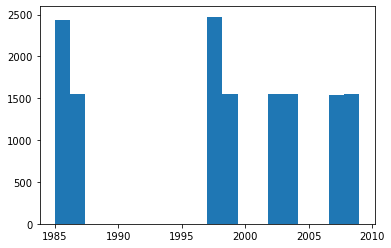

In [154]:
plt.hist(bigmart.Outlet_Establishment_Year  , bins=20)
plt.show()


In [155]:
bigmart["Outlet_Age"] = 2022 - bigmart.Outlet_Establishment_Year 
bigmart["Outlet_Age"].unique()

array([23, 13, 24, 35, 37, 20, 15, 25, 18], dtype=int64)

In [156]:
bigmart.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [157]:
bigmart.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [158]:
bigmart.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# ploting the features

<AxesSubplot:>

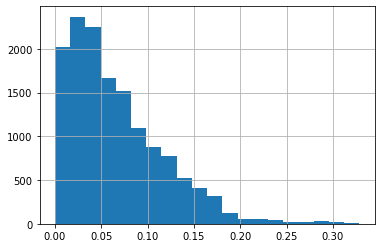

In [159]:
bigmart.Item_Visibility.hist(bins=20)

<AxesSubplot:>

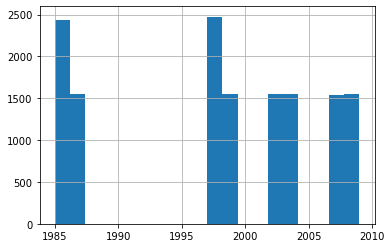

In [160]:
bigmart.Outlet_Establishment_Year.hist(bins = 20)

In [161]:
bigmart.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

# Detecting Outliers

In [162]:
# outlier => an outlier is a data point that lies outside the overall patters in a distrubution

# a common used rule states that a data point is an outlier is an outlier if
#  it is a more than 1.5 * IQR above the third quartile or below the first quartile
# IQR => Inter Quantile Range
# using this we can remov the outliers and output the resulting data in fill_data variables

In [163]:
#calculate first quantile for item_visibility
Q1 = bigmart.Item_Visibility.quantile(0.25)
Q1

0.027035682499999998

In [164]:
#calculate third quantile for item_visibility
Q3 = bigmart.Item_Visibility.quantile(0.75)
Q3

0.0940372535

In [165]:
#calculate the interquantile range (IQR)
IQR = Q3 - Q1 ;
IQR

0.06700157100000001

In [166]:
#now IQR range is known , remove the outliers from the data
fill_data = bigmart.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR) ')

In [167]:
fill_data2 = bigmart.Item_Visibility.apply(lambda Item_Visibility  : ( Q1 - 1.5 * IQR) <= Item_Visibility <= (Q3 + 1.5 * IQR) )
fill_data2.value_counts()

True     13943
False      261
Name: Item_Visibility, dtype: int64

In [168]:
fill_data.Item_Visibility.value_counts()

0.000000    879
0.076841      3
0.076975      3
0.076856      3
0.076792      3
           ... 
0.103091      1
0.052389      1
0.013355      1
0.019551      1
0.104720      1
Name: Item_Visibility, Length: 12753, dtype: int64

In [169]:
bigmart  = fill_data

In [170]:
#calculatin for item visibility
bigmart["Item_Visibility_bins"] = pd.cut(bigmart.Item_Visibility , [0.000 , 0.065 , 0.130 , 0.200] , labels= ['low viz' , 'viz' , 'high viz'])

In [171]:

bigmart = bigmart.drop("Item_Visibility" , axis = 1)

In [172]:
bigmart.Item_Visibility_bins = bigmart.Item_Visibility_bins.fillna( 'low viz' ) 
bigmart.Item_Visibility_bins.unique()
# bigmart

['low viz', 'viz', 'high viz']
Categories (3, object): ['low viz' < 'viz' < 'high viz']

# Catagorical data into numerical data using 'Label Encoder'

In [173]:
le = LabelEncoder()

In [174]:
bigmart.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Outlet_Age                      int64
Item_Visibility_bins         category
dtype: object

In [175]:
bigmart.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [176]:
#for comparative variable
bigmart["Item_Visibility_bins"] = le.fit_transform(bigmart["Item_Visibility_bins"])
bigmart["Outlet_Location_Type"] = le.fit_transform(bigmart["Outlet_Location_Type"])
bigmart["Outlet_Size"] = le.fit_transform(bigmart["Outlet_Size"])

In [177]:
bigmart.Item_Identifier.value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [178]:
#FD => food
#NC => Non - Consumable
#Dr => Drinks
bigmart.Item_Identifier = bigmart.Item_Identifier.apply(lambda id : id[:2] )
bigmart.Item_Identifier = bigmart.Item_Identifier.map( {"FD" : "food" , "NC" : "non-consumable" , "DR" : "drinks"})
bigmart.Item_Identifier.value_counts()

food              9991
non-consumable    2652
drinks            1300
Name: Item_Identifier, dtype: int64

In [179]:
#for non-comparative variable
def create_dummies(column):
    global bigmart
    df = pd.get_dummies(bigmart[column])

    df =  df.iloc[ : , 1: ] 

    bigmart = bigmart.drop( column  , axis = 1)
    bigmart = pd.concat( [  bigmart , df  ], axis   = 1 )

create_dummies("Item_Fat_Content" )
create_dummies("Outlet_Type" )


df = pd.get_dummies(bigmart[ "Item_Identifier" ]  )
df =  df.iloc[ : , 1: ]
bigmart = pd.concat( [  bigmart , df  ], axis   = 1 ,)

In [180]:
bigmart.head(2)

,Item_Identifier,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,regular,Supermarket Type1,Supermarket Type2,Supermarket Type3,food,non-consumable
0,food,9.30,Dairy,249.8092,OUT049,1999,1,0,3735.1380,23,1,0,1,0,0,1,0
1,drinks,5.92,Soft Drinks,48.2692,OUT018,2009,1,2,443.4228,13,1,1,0,1,0,0,0


In [181]:
bigmart.drop( ["Outlet_Establishment_Year" , "Item_Type"] , axis=1 , inplace = True)
bigmart.head(2)

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,regular,Supermarket Type1,Supermarket Type2,Supermarket Type3,food,non-consumable
0,food,9.30,249.8092,OUT049,1,0,3735.1380,23,1,0,1,0,0,1,0
1,drinks,5.92,48.2692,OUT018,1,2,443.4228,13,1,1,0,1,0,0,0


In [182]:
bigmart.to_csv("bigmart_clean_data.csv" ,index = False)